# BOARD INFINITY
 
 # *************DECODE 11.3 HACKATHON
 
 # DONE BY - M.GURUPRASAD REDDY

In [41]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
pwd

'C:\\Users\\GURU\\Downloads\\Hackathon'

In [43]:
#loading the data into the dataframe
data=pd.read_excel("C:\\Users\GURU\Downloads\Hackathon\Dataset.hackathon.xlsx")

In [44]:
data.columns

Index(['Ticket Id', 'Student or WP', 'Program Name', 'Status (Ticket)',
       'Created Time (Ticket)', 'Ticket Closed Time', 'First Response Time',
       'Project Phase'],
      dtype='object')

In [45]:
data.head(15)

,Ticket Id,Student or WP,Program Name,Status (Ticket),Created Time (Ticket),Ticket Closed Time,First Response Time,Project Phase
0,6403,Working Professionals,Fullstack Program,Closed,2021-05-14 01:09:00,2021-05-14 19:04:00,2021-05-14 08:51:07,trial phase
1,6415,Working Professionals,Backend Program,Duplicate,2021-05-14 10:12:00,2021-05-14 11:23:00,NaT,trial phase
2,6420,Working Professionals,Fullstack Program,Closed,2021-05-14 11:46:00,2021-05-16 00:09:00,2021-05-14 18:14:51,trial phase
3,6402,Student,Fullstack Program,Closed,2021-05-14 01:08:00,2021-05-14 19:04:00,2021-05-14 14:45:04,fullstack-phase-1
4,6423,Working Professionals,Fellowship Program,Closed,2021-05-14 12:17:00,2021-05-14 20:39:00,2021-05-14 12:21:13,trial phase
5,6429,Working Professionals,Fullstack Program,Closed,2021-05-14 13:04:00,2021-05-16 12:43:00,2021-05-14 20:44:12,fullstack-phase-1
6,6404,Student,Fullstack Program,Deleted,2021-05-14 01:12:00,2021-05-14 01:13:00,NaT,fullstack-phase-2
7,6405,Student,Fullstack Program,Closed,2021-05-14 01:23:00,2021-05-18 19:15:00,2021-05-14 14:15:15,fullstack-phase-2
8,6400,Student,Fellowship Program,Closed,2021-05-14 00:26:00,2021-05-14 11:18:00,2021-05-14 08:32:46,system-issues
9,6411,Working Professionals,Backend Program,Closed,2021-05-14 02:15:00,2021-05-17 22:19:00,2021-05-14 11:54:30,backend-phase2


In [46]:
#Getting the information of the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Ticket Id              476 non-null    int64         
 1   Student or WP          476 non-null    object        
 2   Program Name           476 non-null    object        
 3   Status (Ticket)        476 non-null    object        
 4   Created Time (Ticket)  476 non-null    datetime64[ns]
 5   Ticket Closed Time     476 non-null    object        
 6   First Response Time    366 non-null    datetime64[ns]
 7   Project Phase          476 non-null    object        
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 29.9+ KB


#  Check the Datatypes and convert relevant columns to Date and Time format.



In [47]:
#checking  the datatypes of the columns 
data.dtypes

Ticket Id                         int64
Student or WP                    object
Program Name                     object
Status (Ticket)                  object
Created Time (Ticket)    datetime64[ns]
Ticket Closed Time               object
First Response Time      datetime64[ns]
Project Phase                    object
dtype: object

In [48]:
# We know that Ticket Closed Time should be in datetime format so,
# Converting the Ticket Closed Time to datetime datatype.
data["Ticket Closed Time"]=pd.to_datetime(data["Ticket Closed Time"],errors="coerce")

In [49]:
data.dtypes

Ticket Id                         int64
Student or WP                    object
Program Name                     object
Status (Ticket)                  object
Created Time (Ticket)    datetime64[ns]
Ticket Closed Time       datetime64[ns]
First Response Time      datetime64[ns]
Project Phase                    object
dtype: object

In [50]:
#checking for the missing values in the data.
data.isnull().sum()

Ticket Id                  0
Student or WP              0
Program Name               0
Status (Ticket)            0
Created Time (Ticket)      0
Ticket Closed Time         8
First Response Time      110
Project Phase              0
dtype: int64

# Fill the null values in First response time 

In [51]:
#  Finding the average time to give the first responce to the tickets.
avg_first_res_time = np.mean(data["First Response Time"]-data["Created Time (Ticket)"])
avg_first_res_time


Timedelta('0 days 07:38:23.674863387')

In [52]:
 # timedelta is being used for adding time to Created Time (Ticket) column. 
from datetime import timedelta
data["First Response Time"].fillna((data["Created Time (Ticket)"]\
                                    +timedelta(hours=7,minutes=38,seconds=23.674863387)),inplace=True)

In [53]:
data.isnull().sum()

Ticket Id                0
Student or WP            0
Program Name             0
Status (Ticket)          0
Created Time (Ticket)    0
Ticket Closed Time       8
First Response Time      0
Project Phase            0
dtype: int64

# Fill the null values in Ticket Closed Time 

In [54]:
#finding the average time to close the tickets .
avg_close_time = np.mean(data["Ticket Closed Time"]-data["Created Time (Ticket)"])
avg_close_time

Timedelta('0 days 20:59:28.461538461')

In [55]:
#filling the null values with the average close time .
data["Ticket Closed Time"].fillna((data["Created Time (Ticket)"]\
                                    +timedelta(hours=20,minutes=59,seconds=28.461538461)),inplace=True)

In [56]:
data.isnull().sum()

Ticket Id                0
Student or WP            0
Program Name             0
Status (Ticket)          0
Created Time (Ticket)    0
Ticket Closed Time       0
First Response Time      0
Project Phase            0
dtype: int64

 # Now we got the clean data and without any null values.

In [57]:
data.head(10) 

,Ticket Id,Student or WP,Program Name,Status (Ticket),Created Time (Ticket),Ticket Closed Time,First Response Time,Project Phase
0,6403,Working Professionals,Fullstack Program,Closed,2021-05-14 01:09:00,2021-05-14 19:04:00,2021-05-14 08:51:07.000000,trial phase
1,6415,Working Professionals,Backend Program,Duplicate,2021-05-14 10:12:00,2021-05-14 11:23:00,2021-05-14 17:50:23.674863,trial phase
2,6420,Working Professionals,Fullstack Program,Closed,2021-05-14 11:46:00,2021-05-16 00:09:00,2021-05-14 18:14:51.000000,trial phase
3,6402,Student,Fullstack Program,Closed,2021-05-14 01:08:00,2021-05-14 19:04:00,2021-05-14 14:45:04.000000,fullstack-phase-1
4,6423,Working Professionals,Fellowship Program,Closed,2021-05-14 12:17:00,2021-05-14 20:39:00,2021-05-14 12:21:13.000000,trial phase
5,6429,Working Professionals,Fullstack Program,Closed,2021-05-14 13:04:00,2021-05-16 12:43:00,2021-05-14 20:44:12.000000,fullstack-phase-1
6,6404,Student,Fullstack Program,Deleted,2021-05-14 01:12:00,2021-05-14 01:13:00,2021-05-14 08:50:23.674863,fullstack-phase-2
7,6405,Student,Fullstack Program,Closed,2021-05-14 01:23:00,2021-05-18 19:15:00,2021-05-14 14:15:15.000000,fullstack-phase-2
8,6400,Student,Fellowship Program,Closed,2021-05-14 00:26:00,2021-05-14 11:18:00,2021-05-14 08:32:46.000000,system-issues
9,6411,Working Professionals,Backend Program,Closed,2021-05-14 02:15:00,2021-05-17 22:19:00,2021-05-14 11:54:30.000000,backend-phase2


# Finding total no of students and working people raising the tickets.

In [18]:
count=pd.DataFrame(data["Student or WP"].value_counts())
print("no of working professionals : ",count["Student or WP"][0])
print("no of working professionals : ",count["Student or WP"][1])

no of working professionals :  328
no of working professionals :  148


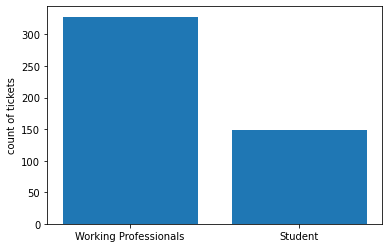

From this plot we can easily say that working professionals are raising more tickets(queries)


In [19]:
fig,ax=plt.subplots()
ax.bar(count.index,count["Student or WP"])
ax.set_ylabel("count of tickets")
plt.show()
print("From this plot we can easily say that working professionals are raising more tickets(queries)")

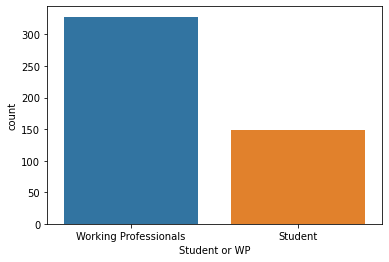

In [20]:
sns.countplot(x=data["Student or WP"])
plt.show()

# Finding the average first responce time to the tickets(queries).

In [21]:
avg_first_res_time = np.mean(data["First Response Time"]-data["Created Time (Ticket)"])
avg_first_res_time


Timedelta('0 days 07:38:23.674863298')

In [22]:
print("On an average the students are getting first respose in {} ".format(avg_first_res_time))

On an average the students are getting first respose in 0 days 07:38:23.674863298 


# Top 10 queries that took more time to resolve

In [23]:
#creating a new colum with the time required to solve each query.
data["time_taken"]=(data["Ticket Closed Time"]-data["Created Time (Ticket)"])

In [24]:
# Getting the indexes of the top 10 time taken queries to solve.
top_10=data["time_taken"].nlargest(10).index.tolist()

In [25]:
# printing out the information of those queries.
data.loc[top_10,["Ticket Id","Student or WP","Program Name","Status (Ticket)","Project Phase","time_taken"]]

,Ticket Id,Student or WP,Program Name,Status (Ticket),Project Phase,time_taken
41,6525,Student,Fullstack Program,Closed,fullstack-phase-1,6 days 18:50:00
179,6748,Working Professionals,Backend Program,Closed,backend-phase-3,4 days 20:55:00
7,6405,Student,Fullstack Program,Closed,fullstack-phase-2,4 days 17:52:00
39,6505,Working Professionals,Backend Program,Closed,backend-phase1,4 days 14:16:00
225,6776,Working Professionals,Backend Program,Closed,fullstack-phase-1,4 days 11:13:00
65,6508,Working Professionals,Backend Program,Closed,system-issues,4 days 01:31:00
102,6633,Student,Fullstack Program,Closed,fullstack-phase-4,3 days 23:15:00
113,6642,Working Professionals,Backend Program,Closed,backend-phase2,3 days 23:14:00
9,6411,Working Professionals,Backend Program,Closed,backend-phase2,3 days 20:04:00
47,6548,Student,Fullstack Program,Closed,trial phase,3 days 08:37:00


In [26]:
data

,Ticket Id,Student or WP,Program Name,Status (Ticket),Created Time (Ticket),Ticket Closed Time,First Response Time,Project Phase,time_taken
0,6403,Working Professionals,Fullstack Program,Closed,2021-05-14 01:09:00,2021-05-14 19:04:00.000000,2021-05-14 08:51:07.000000,trial phase,0 days 17:55:00
1,6415,Working Professionals,Backend Program,Duplicate,2021-05-14 10:12:00,2021-05-14 11:23:00.000000,2021-05-14 17:50:23.674863,trial phase,0 days 01:11:00
2,6420,Working Professionals,Fullstack Program,Closed,2021-05-14 11:46:00,2021-05-16 00:09:00.000000,2021-05-14 18:14:51.000000,trial phase,1 days 12:23:00
3,6402,Student,Fullstack Program,Closed,2021-05-14 01:08:00,2021-05-14 19:04:00.000000,2021-05-14 14:45:04.000000,fullstack-phase-1,0 days 17:56:00
4,6423,Working Professionals,Fellowship Program,Closed,2021-05-14 12:17:00,2021-05-14 20:39:00.000000,2021-05-14 12:21:13.000000,trial phase,0 days 08:22:00
...,...,...,...,...,...,...,...,...,...
471,7163,Working Professionals,Backend Program,Closed,2021-05-20 21:46:00,2021-05-22 09:11:00.000000,2021-05-20 21:49:19.000000,system-issues,1 days 11:25:00
472,7167,Working Professionals,Fullstack Program,Closed,2021-05-20 21:57:00,2021-05-20 22:57:00.000000,2021-05-20 22:56:25.000000,fullstack-phase-1,0 days 01:00:00
473,7171,Working Professionals,Fullstack Program,Open,2021-05-20 23:10:00,2021-05-21 20:09:28.461538,2021-05-21 06:48:23.674863,fullstack-phase-2,0 days 20:59:28.461538
474,7177,Student,Backend Program,Deleted,2021-05-20 23:39:00,2021-05-20 23:57:00.000000,2021-05-21 07:17:23.674863,backend-phase1,0 days 00:18:00


# Which Phase of Project is having highest Queries?


In [27]:
phase_counts=pd.DataFrame(data["Project Phase"].value_counts(ascending=False))
phase_counts

,Project Phase
fullstack-phase-2,96
fullstack-phase-1,88
system-issues,77
fellowship-phase-1,46
backend-phase2,45
trial phase,32
backend-phase1,29
fullstack-phase-3,29
backend-phase-3,17
fullstack-phase-4,17


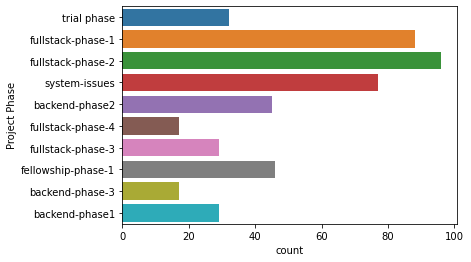

In [28]:
sns.countplot(y=data["Project Phase"])
plt.show()

# Which project phase queries are taking a long time to resolve?

In [29]:
data['int_time_taken'] = data['time_taken'].values.astype(np.int64)        #converting the datetime dtype to int datatype.

average_time = data.groupby('Project Phase').mean()                        # grouping by project pahse column.
average_time['avg_time_taken'] = pd.to_timedelta(average_time['int_time_taken']) # again converting back to datetime format.

In [30]:
phase_avg_time=pd.DataFrame(average_time["avg_time_taken"].nlargest(100)) # arranging in descending order wrt avg_time_taken

In [31]:
phase_avg_time

,avg_time_taken
Project Phase,
fullstack-phase-4,1 days 08:54:58.144796352
backend-phase-3,1 days 01:05:56.470588235
backend-phase1,0 days 22:33:10.344827586
fullstack-phase-1,0 days 22:27:50.777972022
fullstack-phase-2,0 days 21:28:34.014423062
fellowship-phase-1,0 days 20:41:52.792642130
backend-phase2,0 days 20:10:29.333333333
trial phase,0 days 18:50:09.375000
system-issues,0 days 18:12:20.219780207


# On which day highest queries were resolved?


In [40]:

data["query_date"]=(data["Ticket Closed Time"]).dt.date
data.head(3)

,Ticket Id,Student or WP,Program Name,Status (Ticket),Created Time (Ticket),Ticket Closed Time,First Response Time,Project Phase,time_taken,int_time_taken,query_date
0,6403,Working Professionals,Fullstack Program,Closed,2021-05-14 01:09:00,2021-05-14 19:04:00,2021-05-14 08:51:07.000000,trial phase,0 days 17:55:00,64500000000000,2021-05-14
1,6415,Working Professionals,Backend Program,Duplicate,2021-05-14 10:12:00,2021-05-14 11:23:00,2021-05-14 17:50:23.674863,trial phase,0 days 01:11:00,4260000000000,2021-05-14
2,6420,Working Professionals,Fullstack Program,Closed,2021-05-14 11:46:00,2021-05-16 00:09:00,2021-05-14 18:14:51.000000,trial phase,1 days 12:23:00,130980000000000,2021-05-16


In [33]:
data["query_date"].value_counts(ascending=False).head(10)

2021-05-18    127
2021-05-19     91
2021-05-16     75
2021-05-20     68
2021-05-17     56
2021-05-21     24
2021-05-14     23
2021-05-15     11
2021-05-22      1
Name: query_date, dtype: int64

In [34]:
print("WE can say that on 2021-05-18 we got more quries were resolved")

WE can say that on 2021-05-18 we got more quries were resolved


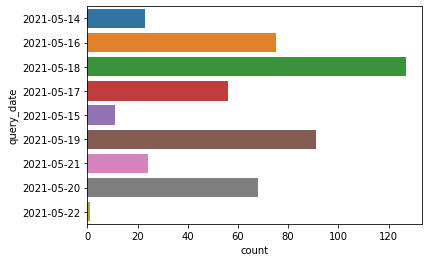

In [35]:
sns.countplot(y=data["query_date"])
plt.show()

# Which phase queries are easier to resolve?

In [36]:
phase_avg_time=pd.DataFrame(average_time["avg_time_taken"].nsmallest(100))

In [37]:
phase_avg_time

,avg_time_taken
Project Phase,
fullstack-phase-3,0 days 15:27:47.586206896
system-issues,0 days 18:12:20.219780207
trial phase,0 days 18:50:09.375000
backend-phase2,0 days 20:10:29.333333333
fellowship-phase-1,0 days 20:41:52.792642130
fullstack-phase-2,0 days 21:28:34.014423062
fullstack-phase-1,0 days 22:27:50.777972022
backend-phase1,0 days 22:33:10.344827586
backend-phase-3,1 days 01:05:56.470588235


In [38]:
print('By seeing the above table we can say that fullstack-phase-3 queries are a way easier to resolve')

By seeing the above table we can say that fullstack-phase-3 queries are a way easier to resolve


# Provide Conclusion for your analysis.

* Working professionals are raising more queries than students (almost double of students).

* Till now we are giving first respose withi seven and half hours from ticket raised time .

* Fullstack programe queries are taking more time to resolve

* We are getting more queries in fullstack-phase-2 of Project Phase.

* fullstack-phase-4 queries are taking more time to solve when compared to another project phases.

* On 2021-05-18  we solved more queries.